In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Загрузка и подготовка датасета

Создаем датафрейм из датасета

In [104]:
df = pd.read_csv('rus_ultimate_players.csv')

In [105]:
df.head()

,name,teams,teams_cnt,tournaments,countries,finals,first places,spirit of the game,MVP,tournaments organized
0,Valeria Besedina,['Питер Старс'],1,12.0,2.0,5.0,2.0,2.0,1.0,NaN
1,Albina Gabitova,['Шерлар'],1,16.0,2.0,2.0,1.0,4.0,NaN,1.0
2,Salma Hayek,[],0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Roma Litovchenko,[],0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Vova Matsal,['Шерлар'],1,7.0,NaN,1.0,NaN,2.0,NaN,NaN


Изменим Nan значения на 0

In [106]:
df = df.fillna(0)

In [107]:
df.head()

,name,teams,teams_cnt,tournaments,countries,finals,first places,spirit of the game,MVP,tournaments organized
0,Valeria Besedina,['Питер Старс'],1,12.0,2.0,5.0,2.0,2.0,1.0,0.0
1,Albina Gabitova,['Шерлар'],1,16.0,2.0,2.0,1.0,4.0,0.0,1.0
2,Salma Hayek,[],0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Roma Litovchenko,[],0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Vova Matsal,['Шерлар'],1,7.0,0.0,1.0,0.0,2.0,0.0,0.0


# Анализ

## Посмотрим зависимости

Видна прямая зависимость между количеством турниров, в которых участвует игрок, и кол-вом финалов у него (растет профессионализм)

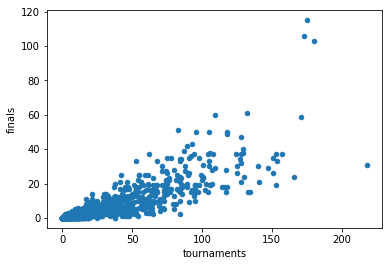

In [40]:
df.plot.scatter(x='tournaments', y='finals')

Также прямая зависимость между количеством турниров/финалов и кол-вом первых мест у игрока

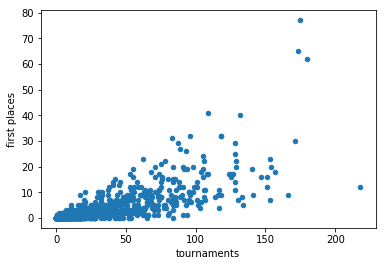

In [41]:
df.plot.scatter(x='tournaments', y='first places')

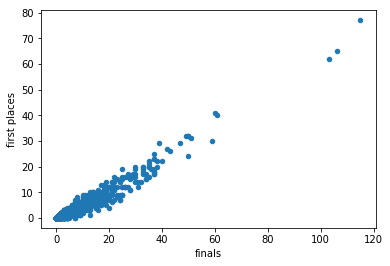

In [42]:
df.plot.scatter(x='finals', y='first places')

По поводу организации турниров не видно никакой особой зависимости: больше организовывают турниры те, кто играл в не очень большом кол-ве турниров + видно несколько выбросов.

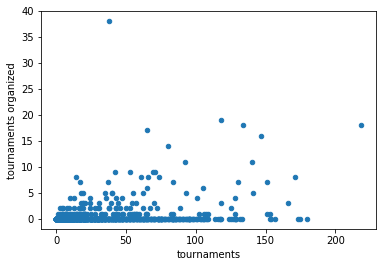

In [43]:
df.plot.scatter(x='tournaments', y='tournaments organized')

Прямая зависимость прослеживается между кол-вом турниров и кол-вом наград за "Дух игры" (награда команде за честную, аккуратную и позитную игру). Это логично - чем больше играешь, тем больше опыта и игра становится более аккуратно и качественной.

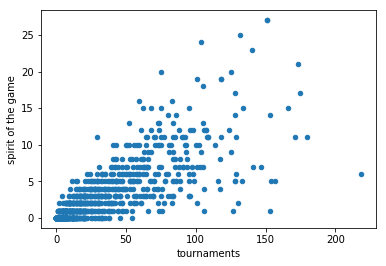

In [44]:
df.plot.scatter(x='tournaments', y='spirit of the game')

Между кол-вом турниров и кол-вом MVP у игрока (MVP = награда "Лучший игрок турнира") не видно собой зависимости. 

Видно несколько выбросов (игрок, который получил намного больше всех наград MVP и игрок, который сыграл в самом большом кол-ве турниров, но у него мало MVP)

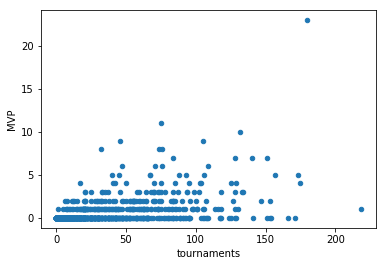

In [45]:
df.plot.scatter(x='tournaments', y='MVP')

Теперь посмотрим на имена рекордсменов (у них максимальное значение по какой-то из метрик)

 - в наибольшем кол-ве турниров сыграл Юрий Ровда
 - больше всего финалов у Саши Пустовой (у нее же больше всего первых мест)
 - больше всего наград за дух игры у Светы Паскевич и Антона Малькова
 - больше всего MVP у Оли Коченовой (она же сыграла в наибольшем кол-ве стран = 22!)
 - а больше всего турниров организовала Саша Ларина

In [56]:
df[(df.tournaments == max(df.tournaments)) | 
   (df.MVP == max(df.MVP)) |
   (df['first places'] == max(df['first places'])) |
   (df['finals'] == max(df['finals'])) |
   (df['spirit of the game'] == max(df['spirit of the game'])) |
   (df['tournaments organized'] == max(df['tournaments organized'])) |
   (df['countries'] == max(df['countries']))
  ]

,name,teams,teams_cnt,tournaments,countries,finals,first places,spirit of the game,MVP,tournaments organized
411,Ольга Коченова,['Элвис Пресли'],1,180.0,22.0,103.0,62.0,11.0,23.0,0.0
462,Александра Ларина,[],0,38.0,0.0,0.0,0.0,0.0,0.0,38.0
514,Антон Мальков,"['Биозон', 'Бивни']",2,151.0,11.0,26.0,12.0,27.0,7.0,1.0
609,Светлана Паскевич,"['Алтимат Альянс', 'Лас Чикас', 'Биозон']",3,151.0,8.0,35.0,16.0,27.0,0.0,7.0
653,Александра Пустовая,['Космик Гелз'],1,175.0,20.0,115.0,77.0,17.0,4.0,0.0
664,Юрий Ровда,"['Флаинг Степс', 'Новгородские медведи']",2,218.0,19.0,31.0,12.0,6.0,1.0,18.0


## Посмотрим статистику по командам

Для этого нужно немного преобразовать датасет (преобразовать str из teams в list и разложить его по строкам)

In [108]:
df.teams = df.teams.str.replace('[','',regex=True).replace(']','',regex=True).replace('\'','',regex=True)

In [109]:
df.teams = df.teams.apply(lambda x: x.split(', '))

In [112]:
df_teams_raw = df.teams.apply(pd.Series) \
    .merge(df, right_index = True, left_index = True) \
    .drop(["teams"], axis = 1) \
    .melt(id_vars = ['name',
                     'teams_cnt', 
                     'tournaments', 
                     'countries', 
                     'finals', 
                     'first places',
                     'spirit of the game',
                     'MVP',
                     'tournaments organized'
                    ], value_name = "teams") \
    .drop("variable", axis = 1) \
    .dropna()

In [113]:
df_teams_raw.tail()

,name,teams_cnt,tournaments,countries,finals,first places,spirit of the game,MVP,tournaments organized,teams
2805,Артем Шахпаронов,3,94.0,6.0,13.0,1.0,8.0,3.0,0.0,Сенатор
2806,Ксения Шевнина,3,86.0,15.0,18.0,6.0,14.0,0.0,0.0,Сборная России ЖД
2836,Алексей Эйдлин,3,35.0,3.0,7.0,1.0,4.0,1.0,0.0,ФинУниверситет
2852,Ксения Ясалова,3,85.0,12.0,34.0,15.0,7.0,1.0,0.0,Сборная России ЖД
2854,Иван Яшкин,3,24.0,0.0,6.0,2.0,3.0,0.0,0.0,Челябинск


In [137]:
teams = df_teams_raw.groupby(['teams']).mean()

Таблица со средними значениями по игрокам в каждой команде. 

Например, в среднем в наибольшем кол-ве турниров приняли участие игроки из команды M.U.С.

In [138]:
teams

,teams_cnt,tournaments,countries,finals,first places,spirit of the game,MVP,tournaments organized
teams,,,,,,,,
,0.000000,15.017544,1.011696,2.584795,1.163743,1.415205,0.286550,0.456140
E-Motion,1.000000,8.500000,2.000000,0.000000,0.000000,1.000000,0.000000,0.500000
Easy Frisbee Team,1.111111,8.222222,0.222222,2.444444,0.888889,1.222222,0.555556,0.000000
FireDogs,1.571429,18.714286,1.142857,4.571429,1.428571,3.571429,1.000000,1.428571
Flying Angels Bern,3.000000,28.000000,10.000000,6.000000,1.000000,4.000000,0.000000,0.000000
Freedom,3.000000,18.500000,0.000000,4.500000,2.000000,1.500000,0.000000,0.000000
Full Stack,1.000000,8.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000
Fusion,1.000000,22.000000,5.000000,2.500000,1.500000,1.500000,0.000000,0.000000
G&C,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Распределение среднего кол-ва наград "дух игры" у игроков для команд

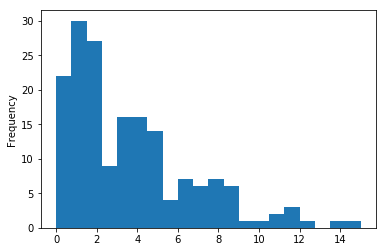

In [168]:
teams['spirit of the game'].plot.hist(bins=20)